# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
min(app_train['DAYS_BIRTH']/365)

20.517808219178082

In [6]:
max(app_train['DAYS_BIRTH']/365)

69.12054794520547

In [39]:
bins=np.linspace(20,70,51)
app_train['YEARS_BIRTH_10'] = pd.cut(app_train['DAYS_BIRTH']/365, bins=np.linspace(20,70,11), labels=list(range(20,70,5)))
app_train['YEARS_BIRTH_10'].value_counts()

35    42868
40    41406
30    39440
45    35135
50    34942
55    33120
25    32862
60    27476
20    12159
65     8103
Name: YEARS_BIRTH_10, dtype: int64

In [38]:
bins=np.linspace(20,70,51)
app_train['YEARS_BIRTH'] = pd.cut(app_train['DAYS_BIRTH']/365, bins=bins, labels=list(range(20,70,1)))
app_train['YEARS_BIRTH'].value_counts()

38    8884
37    8798
39    8767
36    8623
40    8618
27    8485
41    8455
31    8372
43    8312
42    8203
28    7971
32    7909
44    7818
30    7816
35    7796
33    7715
29    7673
34    7628
54    7565
53    7447
46    7294
45    7208
47    7024
48    6971
56    6834
52    6774
57    6771
51    6685
49    6638
59    6635
55    6625
50    6471
58    6255
60    6227
62    5507
61    5420
63    5195
64    5127
26    4559
25    4174
23    4056
24    3908
65    3101
22    2933
66    2086
67    2042
21    1261
68     858
69      16
20       1
Name: YEARS_BIRTH, dtype: int64

In [41]:
x = app_train['YEARS_BIRTH'].unique().sort_values()
y = app_train.groupby('YEARS_BIRTH')['TARGET'].mean()
x2 = app_train['YEARS_BIRTH_10'].unique().sort_values()
y2 = app_train.groupby('YEARS_BIRTH_10')['TARGET'].mean()

<BarContainer object of 10 artists>

<Figure size 1440x720 with 0 Axes>

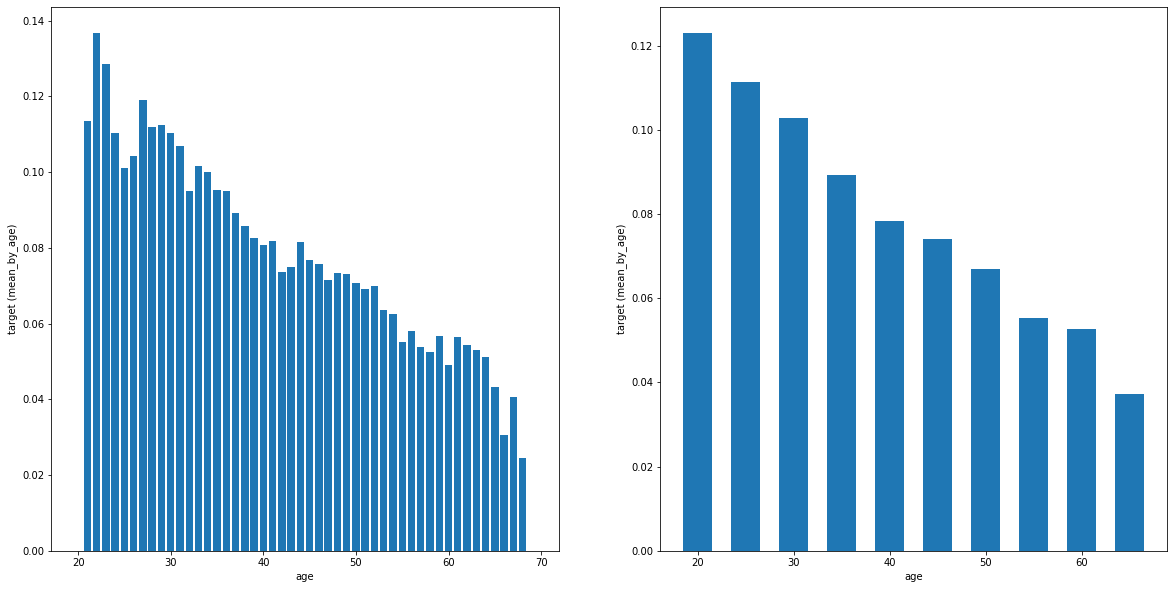

In [47]:
plt.figure(figsize=(20,10))
fig , ax = plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.xlabel('age')
plt.ylabel('target (mean_by_age)')
plt.bar(x, y, width=0.8)
plt.subplot(1, 2, 2)
plt.xlabel('age')
plt.ylabel('target (mean_by_age)')
plt.bar(x2, y2, width=3)